# Cartografía

En este notebook trabajaremos con información geográfica. Estudiaremos el _data set_ de viajes de la encuesta origen-destino, enfocándonos en distintos patrones geográficos que puedan ayudarnos a responder preguntas específicas.


## Preámbulo y Carga de Datos

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

EOD_PATH = Path("data") / "EOD_STGO"

In [13]:
from chiricoca.config import setup_style
setup_style(dpi=100)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd


In [5]:
import huedhued.eod_scl as eod

viajes = eod.read_trips(EOD_PATH)
viajes.head()

Hogar   Persona       Viaje  Etapas ComunaOrigen ComunaDestino  \
0  173431  17343102  1734310202       1        Maipú         Maipú   
1  173441  17344101  1734410101       2        Maipú    Las Condes   
2  173441  17344101  1734410102       2   Las Condes         Maipú   
3  173441  17344103  1734410301       2        Maipú         Ñuñoa   
4  173441  17344103  1734410302       2        Ñuñoa         Maipú   

  SectorOrigen SectorDestino  ZonaOrigen  ZonaDestino  ...  \
0     Poniente      Poniente         400          407  ...   
1     Poniente       Oriente         407          307  ...   
2      Oriente      Poniente         307          407  ...   
3     Poniente       Oriente         407          437  ...   
4      Oriente      Poniente         437          407  ...   

   FactorDomingoNormal  FactorLaboralEstival  FactorFindesemanaEstival  \
0                  NaN                   NaN                       NaN   
1                  NaN                   NaN                       NaN   
2                  NaN                   NaN                       NaN   
3                  NaN                   NaN                       NaN   
4                  NaN                   NaN                       NaN   

   CodigoTiempo ModoDifusion  DistEuclidiana DistManhattan Imputada  TipoDia  \
0           0.0         Bip!            5387          7608        0  Laboral   
1           0.0         Bip!           18841         26100        0  Laboral   
2           0.0         Bip!           18841         26100        0  Laboral   
3           0.0         Bip!           13392         17589        0  Laboral   
4           0.0         Bip!           13392         17589        0  Laboral   

   FactorExpansion  
0         1.000000  
1         1.127220  
2         1.127220  
3         1.127220  
4         1.052764  

[5 rows x 41 columns]

In [16]:

viajes['FactorExpansion'].describe()

count    89774.000000
mean         1.205620
std          0.224139
min          0.817907
25%          1.000000
50%          1.127220
75%          1.482104
max          1.505878
Name: FactorExpansion, dtype: float64

<Axes: ylabel='Frequency'>

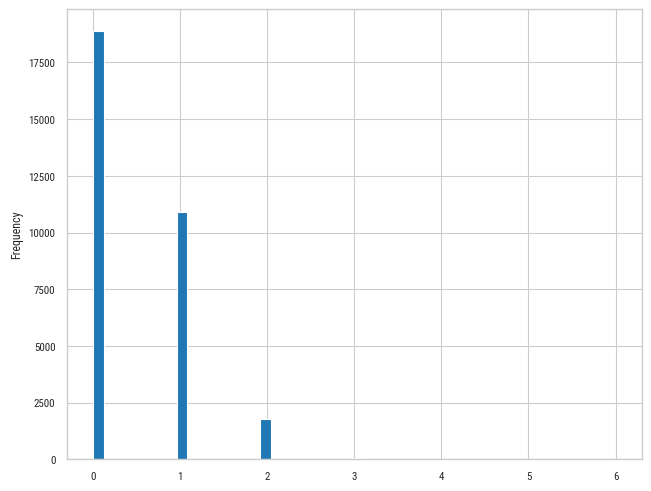

In [14]:
#(viajes[viajes['ModoDifusion'] == 'Bip!']['Etapas'] - 1).plot(kind='hist', bins=50)

In [18]:
len(viajes)

89775

In [17]:
personas = eod.read_people(EOD_PATH)
personas

Hogar   Persona  AnoNac    Sexo          Relacion  Viajes  \
0      100010  10001001    1958  Hombre  Jefe(a) de Hogar       2   
1      100010  10001002    1956   Mujer  Cónyuge o pareja       5   
2      100010  10001003    1982   Mujer       Hijo o Hija       0   
3      100020  10002001    1954  Hombre  Jefe(a) de Hogar       4   
4      100020  10002002    1961   Mujer  Cónyuge o pareja       2   
...       ...       ...     ...     ...               ...     ...   
60049  706791  70679101    1956   Mujer  Cónyuge o pareja       2   
60050  706791  70679102    1955  Hombre  Jefe(a) de Hogar       0   
60051  743813  74381301    1943  Hombre  Jefe(a) de Hogar       2   
60052  743813  74381302    1943   Mujer  Cónyuge o pareja       2   
60053  743823  74382301    1957  Hombre  Jefe(a) de Hogar       2   

      LicenciaConducir  PaseEscolar  AdultoMayor  Estudios  ...  \
0                    3            2            2       4.0  ...   
1                    1            2            2       5.0  ...   
2                    1            2            2       7.0  ...   
3                    3            2            2       4.0  ...   
4                    1            2            2       4.0  ...   
...                ...          ...          ...       ...  ...   
60049                1            2            2       4.0  ...   
60050                1            2            2       5.0  ...   
60051                1            2            2       5.0  ...   
60052                1            2            2       4.0  ...   
60053                1            2            2       5.0  ...   

                        TramoIngreso IngresoFinal TramoIngresoFinal  \
0      Entre 200.001 y 400.000 pesos       240000                 2   
1                                NaN            0                 0   
2      Entre 200.001 y 400.000 pesos       210845                 2   
3             Menos de 200.000 pesos       133000                 1   
4             Menos de 200.000 pesos       193000                 1   
...                              ...          ...               ...   
60049                            NaN            0                 0   
60050  Entre 200.001 y 400.000 pesos       396715                 2   
60051         Menos de 200.000 pesos       140369                 1   
60052         Menos de 200.000 pesos       177636                 1   
60053         Menos de 200.000 pesos       140007                 1   

       IngresoImputado  Factor_LaboralNormal  Factor_SabadoNormal  \
0                    0                   NaN                  NaN   
1                    0                   NaN                  NaN   
2                    2                   NaN                  NaN   
3                    0             169.50230                  NaN   
4                    0              43.26765                  NaN   
...                ...                   ...                  ...   
60049                0                   NaN                  NaN   
60050                2                   NaN                  NaN   
60051                2                   NaN                  NaN   
60052                2                   NaN                  NaN   
60053                2                   NaN                  NaN   

       Factor_DomingoNormal  Factor_LaboralEstival  Factor_FindesemanaEstival  \
0                 1668.2600                    NaN                        NaN   
1                  852.1137                    NaN                        NaN   
2                 1609.1630                    NaN                        NaN   
3                       NaN                    NaN                        NaN   
4                       NaN                    NaN                        NaN   
...                     ...                    ...                        ...   
60049              320.9519                    NaN                        NaN   
60050              320.9519                 

In [20]:
personas['FactorPersona'].describe()

count    60054.000000
mean       110.762561
std        189.334891
min          0.520320
25%         30.848183
50%         56.320710
75%        112.439810
max       3112.450440
Name: FactorPersona, dtype: float64

In [21]:
personas['FactorPersona'].sum()

6651734.82231

In [22]:
viajes_persona = viajes.merge(personas)

viajes_persona["Peso"] = (
    viajes_persona["FactorExpansion"] * viajes_persona["FactorPersona"]
)

print(
    "{} viajes expandidos a {}".format(
        len(viajes_persona), int(viajes_persona["Peso"].sum())
    )
)


89775 viajes expandidos a 12870956


## ¿Dónde se concentran las personas que utilizan cada modo de transporte en la ciudad?

Es de interés saber dónde viven las personas que utilizan cada modo de transporte. Eso permite informar la planificación de nuevas redes de transporte y la gestión de las redes actuales. 

De hecho, podemos utilizar el atributo `Comuna` o `Sector` y resolver tareas del tipo parte-de-un-todo para conocer la distribución del uso de modo de transporte a través de las comunas o sectores. Incluso podemos utilizar un `clustermap` para facilitar encontrar patrones:

<Axes: xlabel='ModoDifusion', ylabel='ComunaOrigen'>

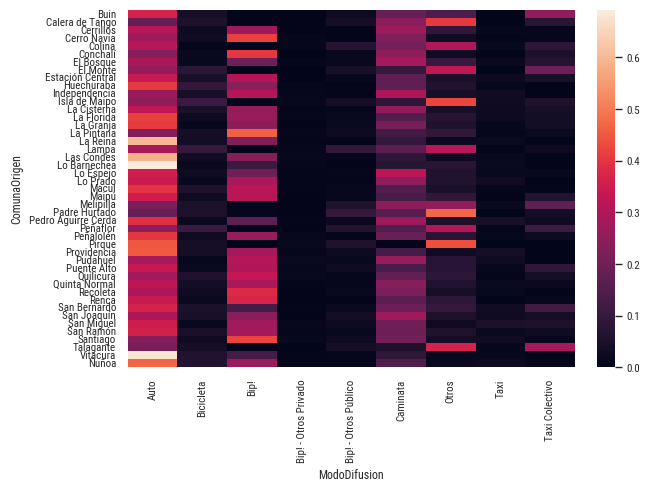

In [26]:
from chiricoca.tables.heatmap import heatmap
from chiricoca.base.weights import normalize_rows

heatmap(
    viajes_persona.groupby(["ComunaOrigen", "ModoDifusion"])
    ["Peso"].sum()
    .unstack(fill_value=0)
    .pipe(normalize_rows),
    yticklabels=True
)

In [ ]:
# from chiricoca.base.weights import variance_stabilization, normalize_rows
# heatmap(
#     viajes_persona.groupby(["ComunaOrigen", "ModoDifusion"])["Peso"]
#     .sum()
#     .unstack(fill_value=0)
#     .pipe(normalize_rows),
#     cluster_rows=True
# )

Sin embargo, esta pregunta tiene una componente geográfica: el _dónde_. También es de interés saber si dos comunas/sectores/barrios/etc. cercanos tienen comportamiento similar, y si no, entender el contexto urbano que causa la diferencia.

Ante esa necesidad, un mapa es inmejorable. Pero, ¿cómo construir y configurar el mapa? 

Primero, veamos cómo luces las coordenadas que vienen dentro de los datos:

In [27]:
viajes_persona[
    ["OrigenCoordX", "OrigenCoordY", "DestinoCoordX", "DestinoCoordY"]
].head()


OrigenCoordX  OrigenCoordY  DestinoCoordX  DestinoCoordY
0   335208.7188     6288387.0    338812.3125      6292391.0
1   338536.4375     6291928.0    354267.3438      6302297.0
2   354267.3438     6302297.0    338536.4375      6291928.0
3   338536.4375     6291928.0    350841.6563      6297212.0
4   350841.6563     6297212.0    338536.4375      6291928.0

Si bien las coordenadas están en formato numérico, no las tenemos estructuradas en un `GeoDataFrame`. Para ello, usaremos la función `to_point_geodataframe` para darle contexto geográfico a los datos. Se necesita un parámetro `crs` que define el sistema de coordenadas en que están los datos. De acuerdo a la encuesta EOD, en este caso se usa el sistema [EPSG:32719](https://epsg.io/32719).

Crearemos dos estructuras, una para los orígenes de los viajes y otra para los destinos. 

In [28]:
from chiricoca.geo.utils import to_point_geodataframe

origenes_viajes = to_point_geodataframe(
    viajes_persona, "OrigenCoordX", "OrigenCoordY", crs="epsg:32719"
)

destinos_viajes = to_point_geodataframe(
    viajes_persona, "DestinoCoordX", "DestinoCoordY", crs="epsg:32719"
)


<Axes: >

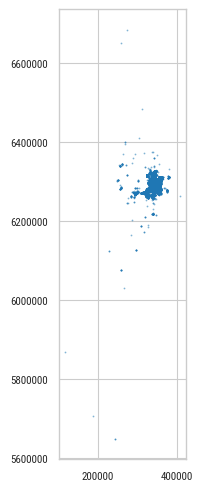

In [29]:
origenes_viajes.plot(markersize=1, marker='.', alpha=0.5)

<Axes: >

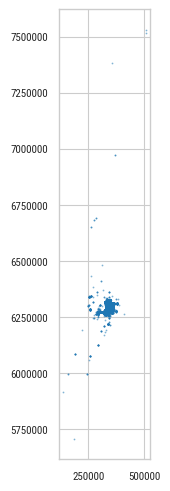

In [30]:
destinos_viajes.plot(markersize=1, marker='.', alpha=0.5)

In [38]:
zones = eod.read_zone_design(EOD_PATH)
zones

ID      AREA   Zona    Com        Comuna  \
0    103  837.7500  103.0  13105     El Bosque   
1    104  998.8125  104.0  13105     El Bosque   
2    106  286.2500  106.0  13105     El Bosque   
3    115  857.4375  115.0  13105     El Bosque   
4    116  853.9375  116.0  13105     El Bosque   
..   ...       ...    ...    ...           ...   
861  329  399.5000  329.0  13115  Lo Barnechea   
862  330  167.7500  330.0  13115  Lo Barnechea   
863  301  681.2500  301.0  13114    Las Condes   
864  311  177.7500  311.0  13114    Las Condes   
865  318  252.5000  318.0  13114    Las Condes   

                                              geometry  
0    POLYGON ((346376.693 6286027.029, 346366.556 6...  
1    POLYGON ((344151.235 6285465.040, 344263.705 6...  
2    POLYGON ((344415.434 6285878.048, 344263.705 6...  
3    POLYGON ((344415.434 6285878.048, 344412.704 6...  
4    POLYGON ((345133.421 6286261.983, 345243.965 6...  
..                                                 ...  
861  POLYGON ((360464.898 6311698.517, 361430.562 6...  
862  POLYGON ((359617.323 6307438.528, 359652.770 6...  
863  POLYGON ((359697.553 6305330.494, 359703.924 6...  
864  POLYGON ((362168.093 6305423.532, 362114.496 6...  
865  POLYGON ((360300.775 6301887.505, 360374.722 6...  

[866 rows x 6 columns]

<Axes: >

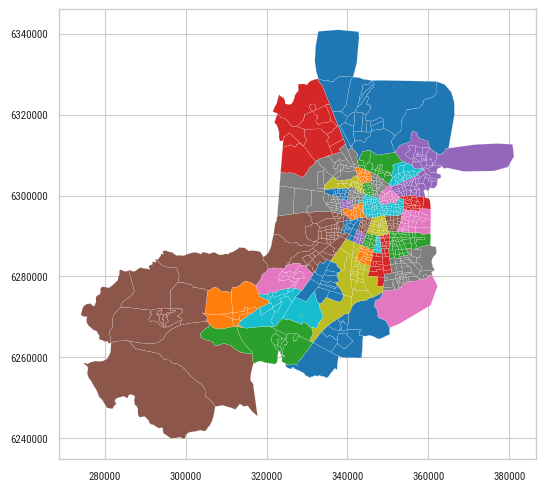

In [34]:
zones.plot(linewidth=0.1, column='Comuna')

/home/egraells/resources/aves/notebooks/new-vis-course/chiricoca/geo/utils.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ).pipe(lambda x: x[x.geometry.area > 0])


<Axes: >

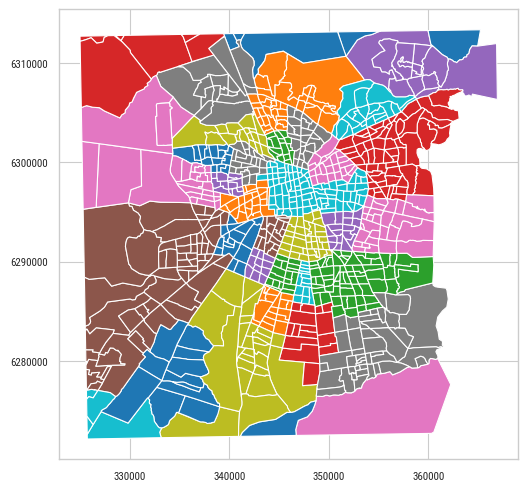

In [39]:
from chiricoca.geo.utils import clip_area_geodataframe

scl_bounds = [-70.88006218, -33.67612715, -70.43015094, -33.31069169]

zones = clip_area_geodataframe(zones.to_crs('epsg:4326'), scl_bounds).to_crs(zones.crs)
zones.plot(column='Comuna')

Ahora nos aseguramos de tener orígenes y destinos que solo se dan dentro del contexto urbano determinado por el `GeoDataFrame` de `zonas`:

<Axes: >

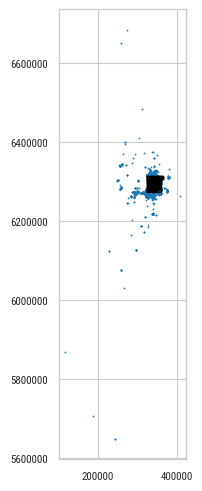

In [49]:
ax = origenes_viajes.plot(marker='.', markersize=1)
zones.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

In [50]:
zones.total_bounds

array([ 324977.99367788, 6272167.53899038,  366962.42947547,
       6313334.24200342])

In [51]:
from chiricoca.geo.utils import clip_point_geodataframe

origenes_viajes = clip_point_geodataframe(origenes_viajes, zones.total_bounds)

destinos_viajes = destinos_viajes[
    destinos_viajes["Viaje"].isin(origenes_viajes["Viaje"])
]

destinos_viajes = clip_point_geodataframe(destinos_viajes, zones.total_bounds)

origenes_viajes = origenes_viajes[
    origenes_viajes["Viaje"].isin(destinos_viajes["Viaje"])
]

len(origenes_viajes), len(viajes_persona)

(82292, 89775)

<Axes: >

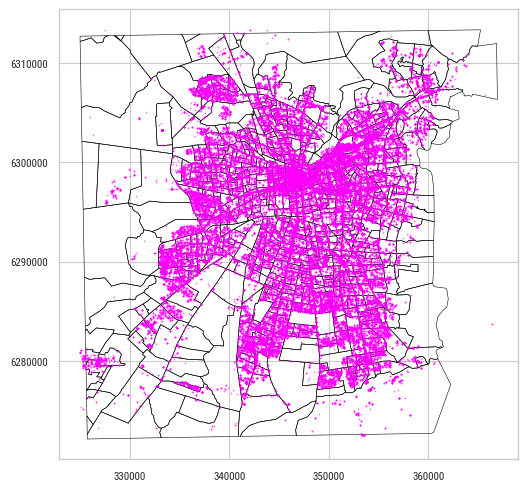

In [53]:
ax = origenes_viajes.plot(marker='.', markersize=1, alpha=0.5, color='magenta', zorder=5)
zones.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.4)

Grafiquemos los datos. Utilizaremos la función `figure_from_geodataframe` de aves que configura los ejes de manera automática, y el método `plot` de GeoPandas puede graficar directamente los puntos de origen/destino:

<Axes: >

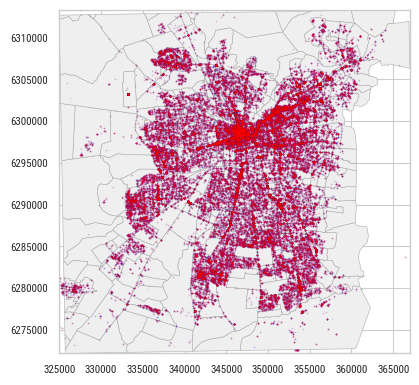

In [55]:
from chiricoca.geo.figures import figure_from_geodataframe

fig, ax = figure_from_geodataframe(zones, height=4, remove_axes=False)

zones.plot(ax=ax, color="#efefef", edgecolor="#abacab", linewidth=0.4)

origenes_viajes.plot(ax=ax, markersize=1, marker=".", color="blue", alpha=0.1)
destinos_viajes.plot(ax=ax, markersize=1, marker=".", color="red", alpha=0.1)


Nos damos cuenta que hay muchos datos que se sobreponen entre sí. Tenemos que:

- **Filtrarlos**, es decir, decidir cuáles son relevantes para la tarea.
- **Visualizarlos** utilizando la técnica adecuada.

Para filtrarlos, fíjemonos en cuatro modos de transporte: 

* público (`Bip!`)
* privado (`Auto`) 
* activo (`Caminata` y `Bicicleta`). 

También enfoquémonos en los viajes al trabajo y al estudio, por su naturaleza recurrente.

Para visualizarlos, en aves tenemos una función `dot_map` que hace un mapa de puntos y que nos permitirá configurar algunos aspectos del gráfico considerando los aspectos que vimos en la clase teórica.

El gráfico se puede hacer así:

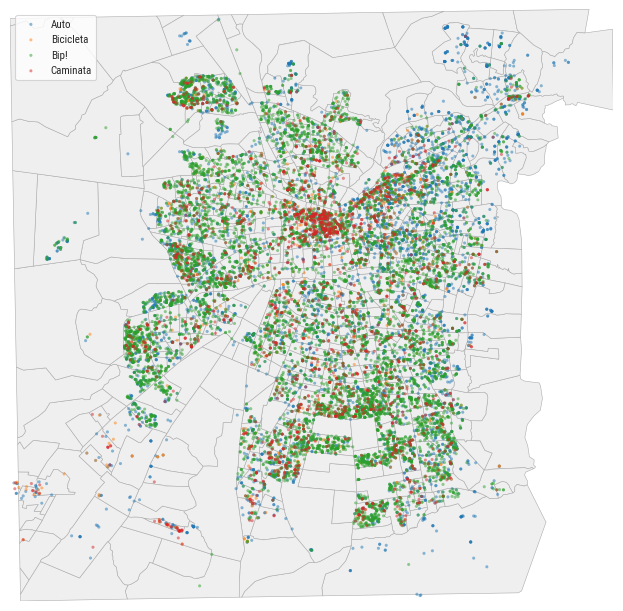

In [57]:
from chiricoca.maps import dot_map

fig, ax = figure_from_geodataframe(zones, height=6, remove_axes=True)

zones.plot(ax=ax, color="#efefef", edgecolor="#abacab", linewidth=0.4)

for idx, group in origenes_viajes[origenes_viajes.Proposito.isin(['Al trabajo', 'Al estudio'])].groupby(
    "ModoDifusion"
):
    if idx in ["Bip!", "Auto", "Caminata", "Bicicleta"]:
        dot_map(group, size=5, alpha=0.5, label=idx, ax=ax)

ax.legend()


Notamos que cada categoría utiliza un tono de color distinto. Sin embargo, cuesta ver una posible distribución geográfica debido a la oclusión y aglomeramiento de los viajes.

Una posible solución es darle un tamaño a cada punto que sea proporcional al peso de los viajes. En tal caso, en vez de `dot_map` utilizaremos `bubble_map`:

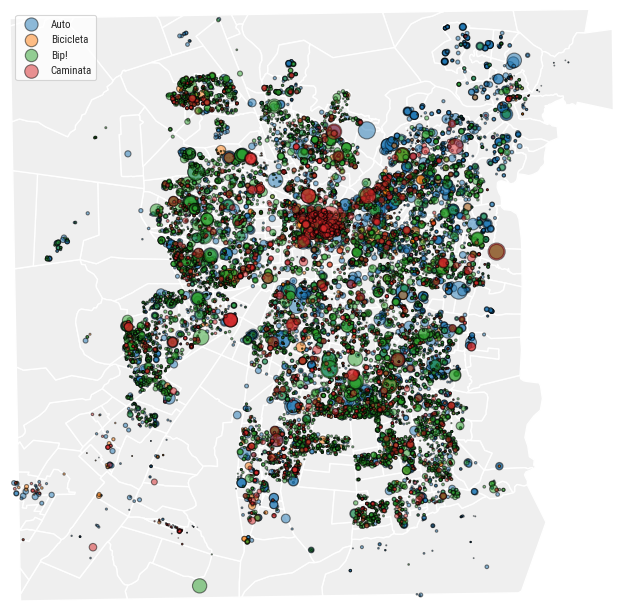

In [60]:
from chiricoca.maps import bubble_map

fig, ax = figure_from_geodataframe(zones, height=6, remove_axes=True)

zones.plot(ax=ax, color="#efefef", edgecolor="white", linewidth=1)

for idx, group in origenes_viajes[origenes_viajes.Proposito.isin(['Al trabajo', 'Al estudio'])].groupby(
    "ModoDifusion"
):
    if idx in ["Bip!", "Auto", "Caminata", "Bicicleta"]:
        bubble_map(group, "Peso", scale=0.05, label=idx, edgecolor='black', alpha=0.5, ax=ax)

ax.legend()


La idea sonaba bien, sin embargo, el gráfico no nos permite responder la pregunta (aunque es un lindo gráfico para compartir y contemplar). Esto se debe a varios factores, incluyendo la interferencia entre los canales utilizados en la codificación visual.

También la implementación del gráfico es compleja. Requiere ciclos a través de los resultados de una operación `groupby`.

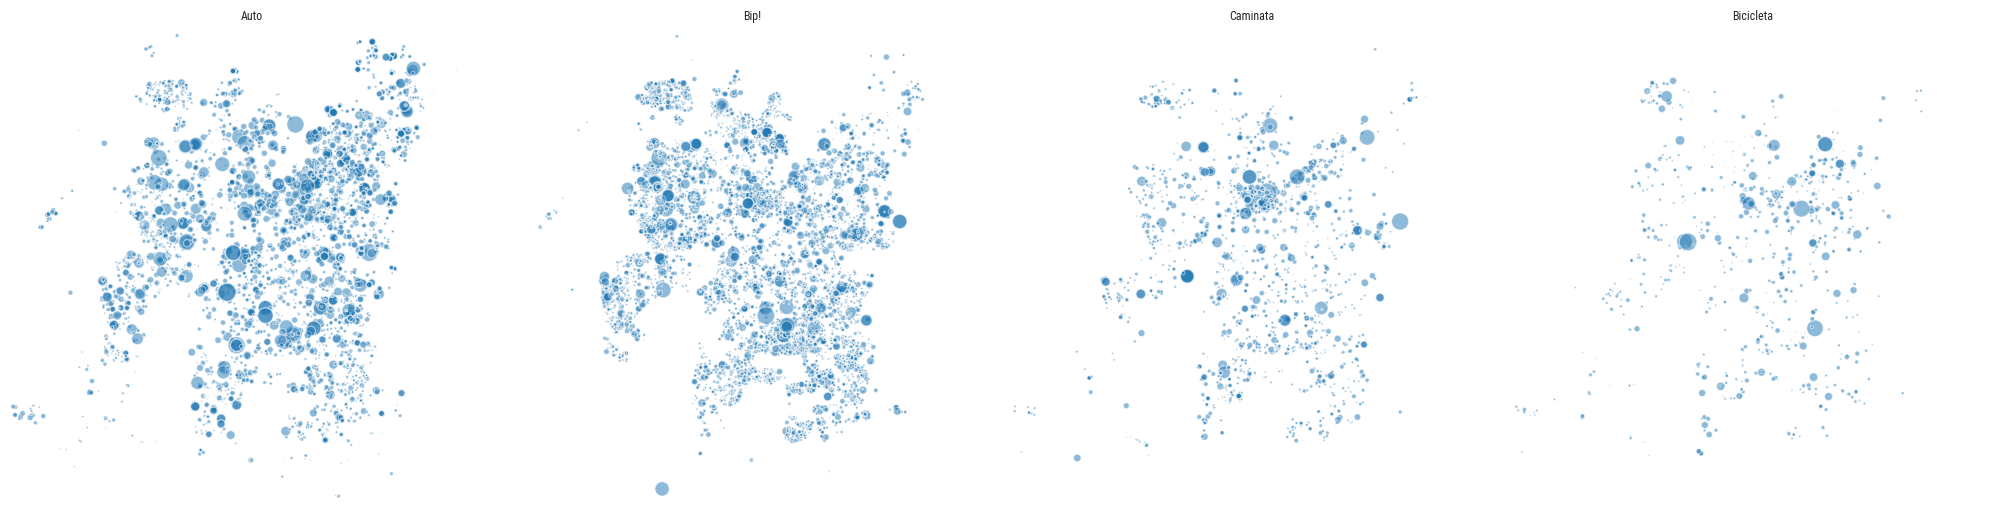

In [61]:
from chiricoca.geo.figures import small_multiples_from_geodataframe

fig, axes = small_multiples_from_geodataframe(zones, 4)


for ax, mode in zip(axes, ["Auto", "Bip!", "Caminata", "Bicicleta"]):
    _geodf = origenes_viajes[origenes_viajes.Proposito.isin(['Al trabajo', 'Al estudio']) & (origenes_viajes['ModoDifusion'] == mode)]
    bubble_map(_geodf, 'Peso', scale=0.05, alpha=0.5, ax=ax)
    ax.set_title(mode)

¡Mucho mejor! Sin embargo, la sobreposición de las burbujas sigue siendo un problema. No logramos ver la distribución debido a la oclusión de los puntos.

Una posible solución es usar un `heat_map`. Solo debemos reemplazar el uso de `bubble_map` por `heat_map` (y usar los parámetros correspondientes):

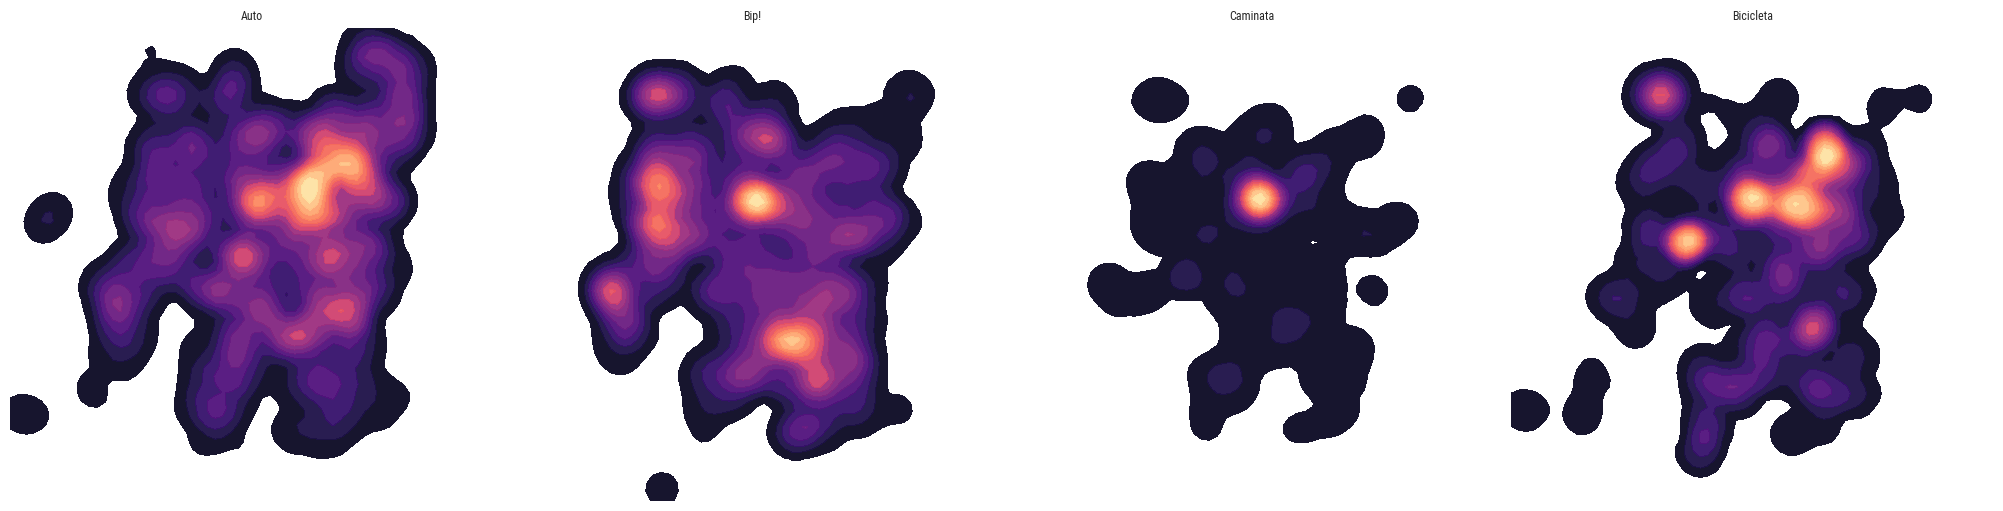

In [72]:
from chiricoca.maps import heat_map

fig, axes = small_multiples_from_geodataframe(zones, 4)


for ax, mode in zip(axes, ["Auto", "Bip!", "Caminata", "Bicicleta"]):
    _geodf =     origenes_viajes[origenes_viajes.Proposito.isin(['Al trabajo', 'Al estudio']) & (origenes_viajes['ModoDifusion'] == mode)]
    heat_map(_geodf, 'Peso', bandwidth=1000, low_threshold=0.025, alpha=0.95, ax=ax, n_levels=15)
    ax.set_title(mode)

Esta técnica de visualización responde nuestra pregunta: nos dice dónde hay concentración, y, al mismo tiempo, deduce una forma, unos límites, para esos lugares que concentran actividad.

Configuremos el gráfico para que sea más amigable. Haremos lo siguiente:

- Haremos un gráfico de 2x2. Para ello necesitamos filtrar por nuestra cuenta los datos, de modo que el objeto `grid` pueda disponer de las filas (o de las columnas) repitiendo valores.
- Agregaremos como base la imagen del territorio que descargamos en el notebook anterior.
- Utilizaremos una leyenda de colores para explicar cuál es el color asociado a la concentración.

In [73]:
import contextily as cx

# bounds = zones.buffer(1000).to_crs("EPSG:3857").total_bounds

# scl_img, scl_ext = cx.bounds2raster(
#     bounds[0],
#     bounds[1],
#     bounds[2],
#     bounds[3],
#     Path("data") / "scl_positron_12.tif",
#     ll=False,
#     source=cx.providers.CartoDB.PositronNoLabels,
#     zoom=12,
# )

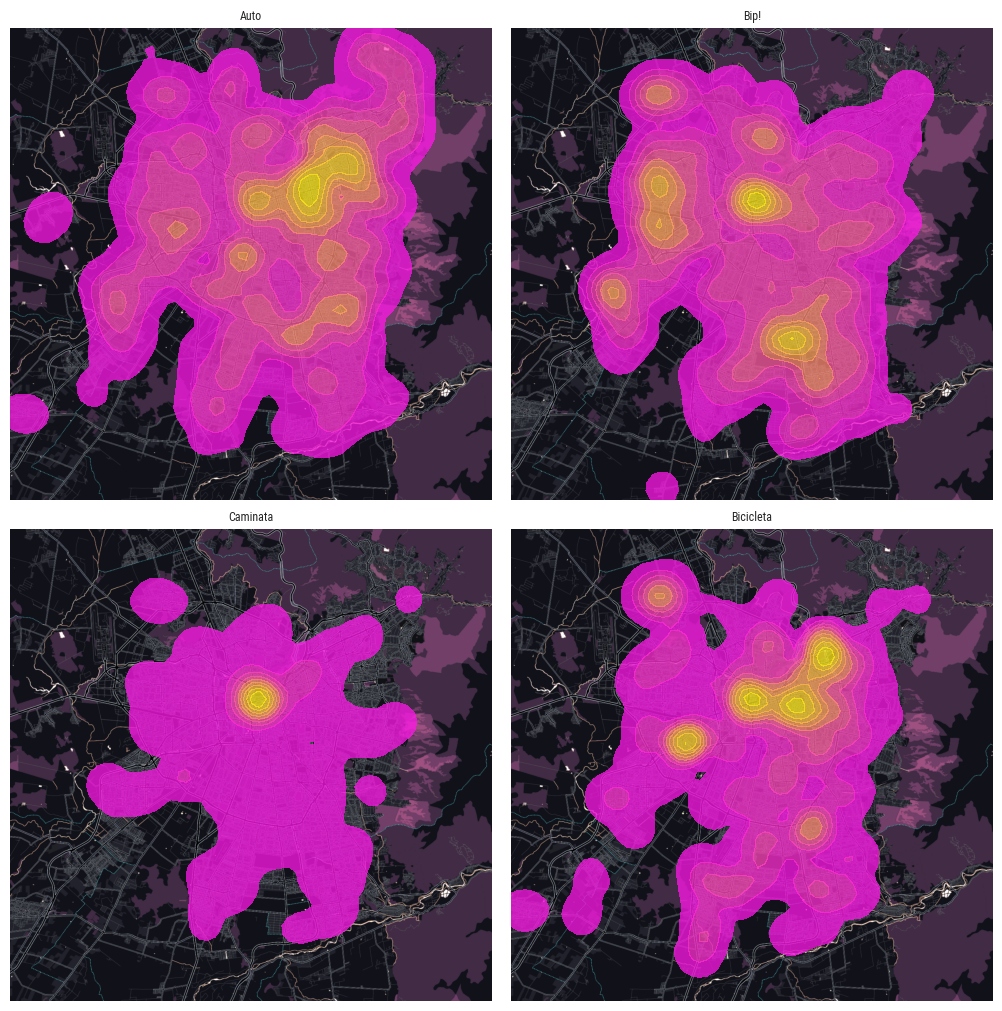

In [77]:
from chiricoca.maps.utils import add_basemap

fig, axes = small_multiples_from_geodataframe(zones, 4, col_wrap=2)

for ax, mode in zip(axes.flatten(), ["Auto", "Bip!", "Caminata", "Bicicleta"]):

    add_basemap(ax, Path("data") / "scl_positron_12.tif", zones)
    
    _geodf =     origenes_viajes[origenes_viajes.Proposito.isin(['Al trabajo', 'Al estudio']) & (origenes_viajes['ModoDifusion'] == mode)]
    
    heat_map(_geodf, 'Peso', bandwidth=1000, low_threshold=0.025, alpha=0.75, ax=ax, n_levels=10, palette='spring')
    ax.set_title(mode)

Agregar el contexto territorial nos permite ver cosas como el rol segregador que juega la autopista Américo Vespucio. **¿Qué otras cosas ven ustedes?**

Ejercicio propuesto:

- Consideren el análisis por grupos etáreos que hicimos la clase pasada. Definan categorías de grupos y determinen cuáles lugares de la ciudad visitan, tanto en general como por propósito de viaje. Rangos de ejemplo incluyen: menores de edad (< 18 años), adultos mayores (> 65 años), etc. 

## ¿Cuán lejos queda el trabajo de acuerdo al lugar de residencia?

Con esta pregunta queremos entender si existe un patrón geográfico en las elecciones de residencia y trabajo de las personas.

Para responder la pregunta, primero filtramos los viajes que nos interesan. No todos los viajes al trabajo se efectúan desde la casa, ni una persona hace un único viaje al trabajo durante el día. Como una manera de alivianar el problema nos quedamos con un único viaje al trabajo por persona.

In [78]:
viajes_trabajo = origenes_viajes[
    (origenes_viajes.Proposito == "Al trabajo") & (origenes_viajes.DistEuclidiana > 0)
].drop_duplicates(subset="Persona", keep="first")

print(len(viajes_trabajo), viajes_trabajo.Peso.sum())

14275 1909367.9644863484


La columna `DistEuclidiana` contiene la distancia entre los puntos de origen y destino de los viajes. Veamos la distribución de la distancia:

In [79]:
viajes_trabajo['DistEuclidiana'].describe().astype(int)

count    14275
mean      9093
std       6590
min          1
25%       3656
50%       7803
75%      13505
max      44973
Name: DistEuclidiana, dtype: int64

Ahora bien, el promedio que nos entregó el método `pd.describe` no considera la representatividad de cada viaje. Podemos utilizar la función `weighted_mean` de aves para calcular el promedio ponderado:

In [80]:
from chiricoca.base.weights import weighted_mean

viajes_trabajo["DistEuclidiana"].mean(), weighted_mean(
    viajes_trabajo, "DistEuclidiana", "Peso"
)

(9093.95299474606, 8600.232929814394)

En este caso, el promedio ponderado no está _tan_ lejos del promedio sin ponderar, pero nada asegura que esa diferencia sea pequeña en toda la ciudad.

Podemos calcular la distancia promedio al trabajo por zona haciendo una operación `pd.groupby`:

In [81]:
distancia_zonas = (
    viajes_trabajo.groupby(["ZonaOrigen"])
    .apply(lambda x: weighted_mean(x, "DistEuclidiana", "Peso") / 1000)
    .rename("distancia_al_trabajo")
)

distancia_zonas

/tmp/ipykernel_6751/1805755864.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, "DistEuclidiana", "Peso") / 1000)


ZonaOrigen
1       6.729763
2       5.574509
3       6.262775
4       5.024115
5       5.636851
         ...    
855    11.337197
857    23.108324
858    21.936320
859    19.593870
860    17.092613
Name: distancia_al_trabajo, Length: 724, dtype: float64

La serie contiene, para cada zona, la distancia promedio al trabajo de la gente que vive en ella (y posiblemente otras más). Si queremos ver esta distribución podemos utilizar el método `plot(kind='kde')`, como hicimos en notebooks anteriores:

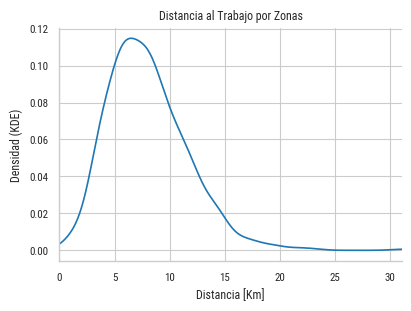

In [82]:
distancia_zonas.plot(kind='kde', figsize=(4, 3))
plt.xlim([0, distancia_zonas.max()])
plt.title('Distancia al Trabajo por Zonas')
plt.xlabel('Distancia [Km]')
plt.ylabel('Densidad (KDE)')
sns.despine()

Ahora bien, esta distribución solamente nos permite saber propiedades estádisticas. ¡No tenemos un contexto geográfico! Por eso necesitamos el mapa, para saber si la distancia tiene relación con la ubicación de cada zona en la ciudad, con saber si zonas que están cerca entre sí tienen distancias al trabajo similares.

Como tenemos los valores de distancia por zona, un _choropleth map_ nos permitiría mostrar la distancia asociada a cada zona al mismo tiempo que su posición geográfica. 

In [83]:
zones_with_distance = zones.join(distancia_zonas, how="inner", on='ID')

Text(0.0, 1.0, 'Distancia al Trabajo [Km]')

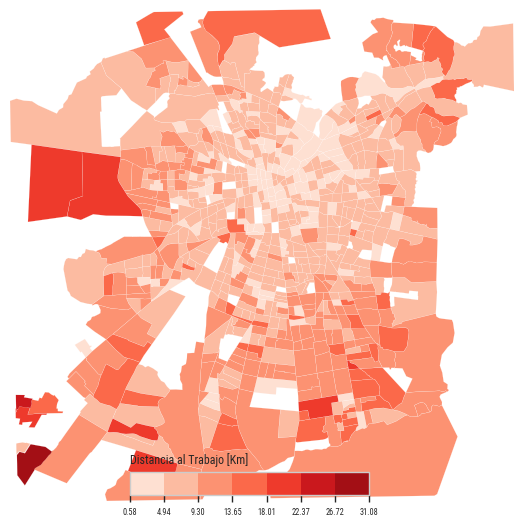

In [84]:
from chiricoca.maps import choropleth_map

ax, map_data = choropleth_map(
    zones_with_distance, "distancia_al_trabajo", k=7, linewidth=0.1)

map_data['cbar_axis'].set_title("Distancia al Trabajo [Km]", loc="left")

¿Cómo se calculan los rangos que son representados por cada color? 

Existen varias alternativas. La opción por omisión es dividir el intervalo de valores posibles en rangos uniformes (opción `binning='uniform'`). Otra es dividir las observaciones en cuantiles (opción `binning='quantiles'`). Y otra es utilizar el esquema llamado [_Natural Breaks_](https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization), que busca la mejor manera de clasificar datos en un número específico de categorías (una especie de clustering _K-Means_ en una dimensión). Lo podemos especificar en la función de dibujo con el parámetro `binning='fisher_jenks'` ([se llama así porque lo inventó _Jenks_ y lo mejoró _Fisher_](http://wiki.objectvision.nl/index.php/Fisher's_Natural_Breaks_Classification)).

Usemos la función `small_multiples_from_geodataframe` para comparar estas tres estrategias de codificación visual en el canal de color:

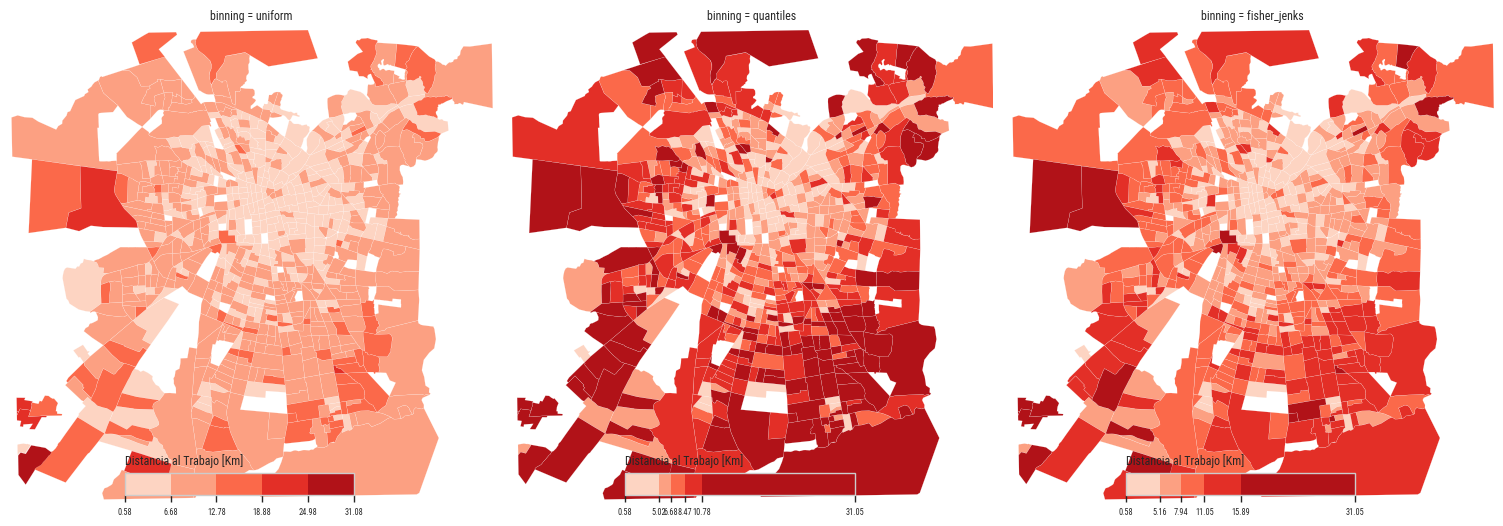

In [85]:
from chiricoca.geo.figures import small_multiples_from_geodataframe

fig, axes = small_multiples_from_geodataframe(zones, 3, height=5)

for binning, ax in zip(['uniform', 'quantiles', 'fisher_jenks'], axes):
    ax.set_title(f'binning = {binning}')
    
    ax, map_data = choropleth_map(zones_with_distance, 'distancia_al_trabajo', k=5, binning=binning, linewidth=0.1, ax=ax)
    map_data['cbar_axis'].set_title('Distancia al Trabajo [Km]', loc='left')

¿Cuál esquema les parece mejor (para una definición de "mejor" elegida por ustedes)? Cada uno tiene sus ventajas y desventajas. 

Ahora bien, en los esquemas que no son uniformes, la leyenda explica que valores más claros tienen menores distancias al trabajo. Al mismo tiempo, observamos la concentración de los trabajos en la ciudad: las zonas más claras tienden a aparecer en Santiago, Providencia, Las Condes, y sus alrededores. Como consecuencia, las zonas periféricas tienen una distancia al trabajo mayor: casi toda la periferia está compuesta de zonas oscuras.

¿Qué otro patrón observan en este mapa? ¿Qué más harían?

**¿Se imaginan este mapa mezclado con los mapas anteriores?** Ése es un ejercicio propuesto.

El esquema de Fisher-Jenks es utilizado con frecuencia posiblemente porque balancea los aspectos de los otros esquemas. Lo utilizaremos para la versión final del mapa, esta vez con información contextual. Además de la información territorial, agregaremos elementos típicos de los mapas cartográficos: una escala y una flecha hacia el norte.

Text(0.0, 1.0, 'Distancia al trabajo (promedio)')

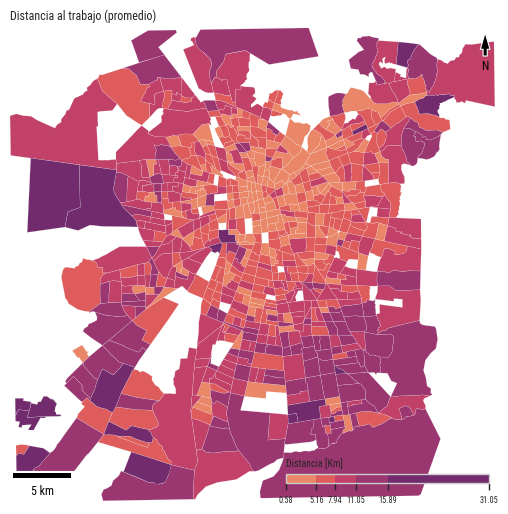

In [86]:
from chiricoca.maps.utils import north_arrow, geographical_scale
ax, map_data = choropleth_map(
    zones_with_distance,
    "distancia_al_trabajo",
    k=5,
    binning="fisher_jenks",
    linewidth=0.1,
    palette='flare',
    cbar_args=dict(
        label="Distancia [Km]",
        width="42%",
        height="2%",
        orientation="horizontal",
        location="lower right",
        label_size="x-small",
        bbox_to_anchor=(0.0, 0.025, 1.0, 0.975)
    ),
)

geographical_scale(ax, location='lower left')
north_arrow(ax, y=0.99, arrow_length=0.07)

ax.set_title("Distancia al trabajo (promedio)", loc="left")

De esta manera el mapa nos permite caracterizar las zonas, y conjuntos de zonas, de acuerdo a la distancia que deben recorrer sus habitantes para ir al trabajo. 

Queda propuesto desagregar este mapa por características de las personas, como su nivel socioeconómico.